### **Importing necessary libraries**

In [1]:
#Basic libraries
import pandas as pd
import numpy as np

# Stats library
from scipy.stats import randint

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xg 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Metrics libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Let's check the dataset.

df_fake = pd.read_csv("train_news.csv")
df_fake

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [3]:
# Shape of the dataset.

df_fake.shape

(20800, 6)

    There are 20800 rows and 6 columns including the target variable.

In [4]:
# Checking the datatype of each column

df_fake.dtypes

Unnamed: 0     int64
id             int64
headline      object
written_by    object
news          object
label          int64
dtype: object

    The target variable is of 'int64' type and the rest are of 'object' type.

### **Dropping the columns**

    In the dataset 2 columns 'Unnamed', 'id' and 'written_by' as these are not contributing much, thus they needs to be
    dropped out from the dataset. 

    'written_by' is being dropped beacuse the author's name of the news won't define whether the news is fake or not.

    'id' is being dropped because evry news is unique and thus, id is unique to each and every news.

In [5]:
# Dropping the columns

df_fake.drop(['Unnamed: 0', 'id', 'written_by'], axis=1, inplace=True)

In [6]:
# Checking the dataset after removing the column

df_fake

,headline,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1
...,...,...,...
20795,NaN,"No, you'll be a dog licking of the vomit of yo...",1
20796,Albert Pike and the European Migrant Crisis,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,Dakota Access Caught Infiltrating Protests to ...,posted by Eddie You know the Dakota Access Pip...,1
20798,How to Stretch the Summer Solstice - The New Y...,"It’s officially summer, and the Society Boutiq...",0


    Now, only 3 columns are there in the dataset including the target variable.

### **Checking the missing values**

In [7]:
# Checking the misisng values

df_fake.isnull().sum()

headline    558
news         39
label         0
dtype: int64

    Only target variable doesn't have any null values, but in 'News' columns there are missing values which needs to 
    be handled.

<AxesSubplot:>

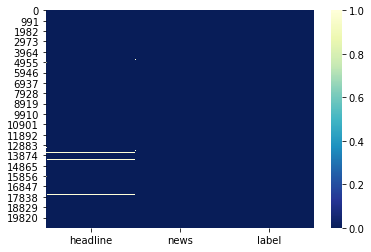

In [8]:
# Visualizing the null values using heatmap.

sns.heatmap(df_fake.isnull(), cmap='YlGnBu_r')

### **Handling Missing Values**

In [9]:
# Filling the null values with 'noNews'

df_fake['headline'] = df_fake['headline'].fillna(" ")
df_fake['news'] = df_fake['news'].fillna(" ")

headline    0
news        0
label       0
dtype: int64 



<AxesSubplot:>

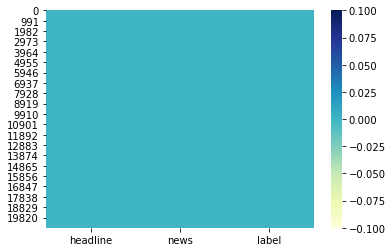

In [10]:
# Checking the missing values again after filling the same.

print(df_fake.isnull().sum(), '\n')

sns.heatmap(df_fake.isnull(), cmap='YlGnBu')

    Now, the missing values ahve been handled. Thus, tha data doesn't contains any null values.

### **Statistical Summary**

    The statistical summary can be shown of the target variable i.e. 'label' as it is the only column being numeric in
    nature.

In [11]:
# Let's check the statistical summary of the dataset.

df_fake.describe()

,label
count,20800.000000
mean,0.500625
std,0.500012
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


    The statistical summary of the train dataset depicts :
    - The minimum value and the maximum value of the attributes is the same i.e. 0 and 1 respectively.
    - The mean and standard deviation is nearly 0-1 of all the attributes in the training dataset.
    - The count of each field is equal which shows that there are no missing values present.

In [12]:
# Checking the statsistical summary of 'object' type data.

df_fake.describe(include='object')

,headline,news
count,20800,20800
unique,19804,20386
top,,
freq,558,114


### **Visualization of data**

In [13]:
# Cheking the value counts of the target variable 'label'

print(df_fake['label'].value_counts(), '\n')

print("Fake ratio : ", round(len(df_fake[df_fake['label'] == 1]) / len(df_fake.label),2)*100, '%')
print("Not Fake ratio : ", round(len(df_fake[df_fake['label'] == 0]) / len(df_fake.label),2)*100, '%')

1    10413
0    10387
Name: label, dtype: int64 

Fake ratio :  50.0 %
Not Fake ratio :  50.0 %


<AxesSubplot:xlabel='label', ylabel='count'>

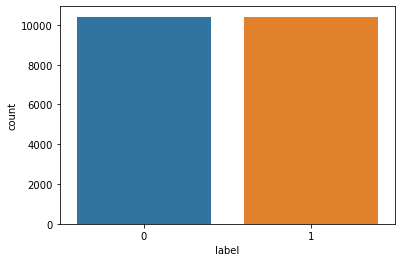

In [14]:
# Visualizing the count of 'label' using countplot.

sns.countplot(df_fake['label'])

    The 'label' are represented by:
        0 = Not a fake news
        1= fake news

    From the above, The counts of both the labels is approximately equal, that' why the percentage ratio is 50% of both. 
    This reflects that the data is balanced.

<AxesSubplot:xlabel='headline', ylabel='Frequency'>

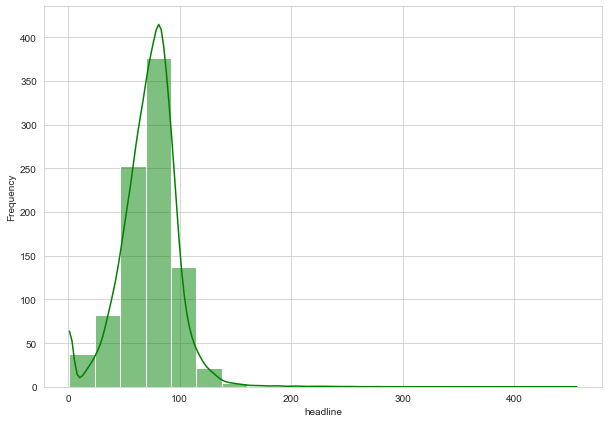

In [15]:
# Distribution of headline length.

sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
headline_len = df_fake.headline.str.len()
sns.histplot(headline_len, bins = 20, color = 'green', stat = 'frequency', kde = True)

    - Above, is the plot showing the headline length frequency. 
    - Majority of the comments are of length between 70 - 80, where maximum length can be seen above 400 and minimum length 
      is 3. 
    - Median length being 75.

<AxesSubplot:xlabel='news', ylabel='Frequency'>

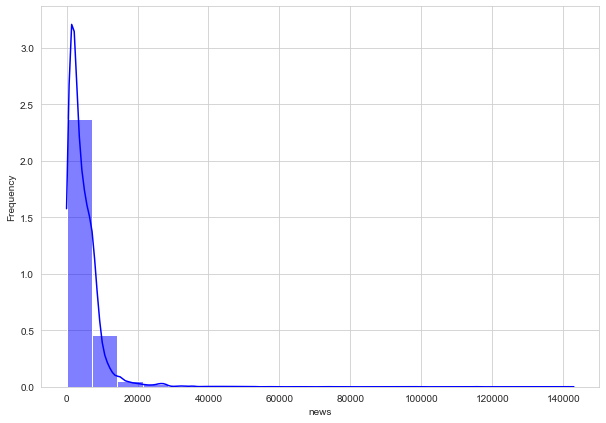

In [16]:
# Distribution of news length.

plt.figure(figsize=(10,7))
news_len = df_fake.news.str.len()
sns.histplot(news_len, bins = 20, color = 'blue', stat = 'frequency', kde = True)

    - Above, is the plot showing the news length frequency. 
    - Majority of the news are of length below 1000, where maximum length is above 140000.

### **Creating new feature**

In [11]:
# Merging both the columns i.e. 'headline' and 'news' to form one column only named 'News'.

df_fake['News'] = df_fake['headline'] + " " + df_fake['news']
df_fake.head()

,headline,news,label,News
0,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Ethics Questions Dogged Agriculture Nominee as...
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1,A Digital 9/11 If Trump Wins Finian Cunningh...


In [12]:
# Chceking the null values in the newly created column.

df_fake.News.isnull().sum()

0

In [13]:
# Dropping the existing features 'headline' and 'news'

df_fake.drop(['headline', 'news'], axis = 1, inplace = True)
df_fake

,label,News
0,0,Ethics Questions Dogged Agriculture Nominee as...
1,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,1,A Digital 9/11 If Trump Wins Finian Cunningh...
...,...,...
20795,1,"No, you'll be a dog licking of the vomit of ..."
20796,1,Albert Pike and the European Migrant Crisis By...
20797,1,Dakota Access Caught Infiltrating Protests to ...
20798,0,How to Stretch the Summer Solstice - The New Y...



Now, there are only 2 attributes in the dataset, one as in input data which is 'News' and output data whcih is 'label'.

### **WordCloud**

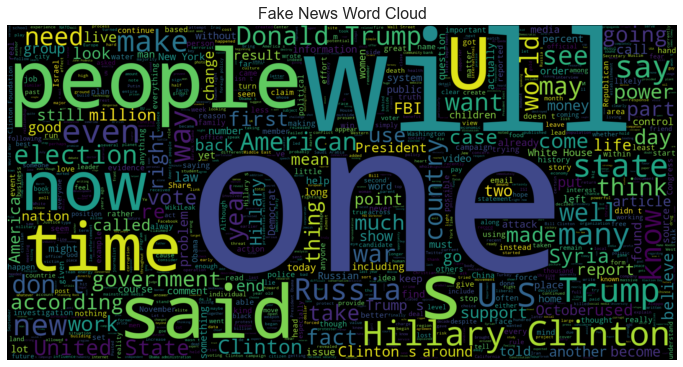

In [21]:
# Word Cloud for fake news

words = ' '.join(df_fake['News'][df_fake['label'] == 1])


word_cloud = WordCloud(
                       width=1600,
                       height=800,
                       max_words=1000, # Maximum numbers of words we want to see 
                       background_color="black").generate(words)

plt.figure(figsize=(12, 8))
plt.imshow(word_cloud, interpolation="bilinear")
plt.title('Fake News Word Cloud', fontsize = 16)
plt.axis("off")
plt.show()

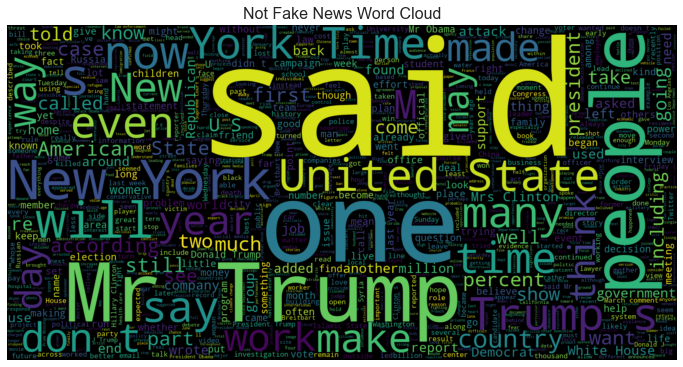

In [22]:
# Word Cloud for not fake news

words = ' '.join(df_fake['News'][df_fake['label'] == 0])


word_cloud = WordCloud(
                       width=1600,
                       height=800,
                       margin=0,
                       max_words=1000, # Maximum numbers of words we want to see 
                       background_color="black").generate(words)

plt.figure(figsize=(12, 8))
plt.imshow(word_cloud, interpolation="bilinear")
plt.title('Not Fake News Word Cloud', fontsize = 16)
plt.axis("off")
plt.show()

### **Data Cleaning**

In [14]:
# Creating a column 'length_before_cleaning' in the dataset.
# Representing the length of the each news respectively in a column 'News' 

df_fake['length_before_cleaning'] = df_fake.News.str.len()
df_fake.head()

,label,News,length_before_cleaning
0,0,Ethics Questions Dogged Agriculture Nominee as...,8021
1,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,6185
2,0,Cotton to House: ’Do Not Walk the Plank and Vo...,526
3,0,"Paul LePage, Besieged Maine Governor, Sends Co...",6617
4,1,A Digital 9/11 If Trump Wins Finian Cunningh...,9193


In [15]:
# Defining the stop words
stop_words = stopwords.words('english')

# Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [16]:
# Function Definition
def clean_news(text):
    
    # convert to lower case
    lowered_text = text.lower()
        
    # Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    # Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    # Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    # Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    # Removing extra newline
    text = text.strip("\n")
    
    # Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    # Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    # Splitting data into words
    tokenized_text = word_tokenize(text)
    
    # Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [17]:
# Applying the above custom function.

df_fake['News'] = df_fake['News'].apply(lambda x: clean_news(x))
df_fake['News']

0        ethic question dogged agriculture nominee geor...
1        u must dig deep stop argentina lionel messi ne...
2        cotton house walk plank vote bill pas senate b...
3        paul lepage besieged maine governor sends conf...
4        digital trump win finian cunningham written ex...
                               ...                        
20795                   dog licking vomit chinese overlord
20796    albert pike european migrant crisis rixon stew...
20797    dakota access caught infiltrating protest inci...
20798    stretch summer solstice new york time official...
20799    emory university pay percent undocumented stud...
Name: News, Length: 20800, dtype: object

In [18]:
# Creating a column 'len_after_cleaning'
# Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.

df_fake['len_after_cleaning'] = df_fake['News'].map(lambda News: len(News))
df_fake

,label,News,length_before_cleaning,len_after_cleaning
0,0,ethic question dogged agriculture nominee geor...,8021,5319
1,0,u must dig deep stop argentina lionel messi ne...,6185,4005
2,0,cotton house walk plank vote bill pas senate b...,526,314
3,0,paul lepage besieged maine governor sends conf...,6617,4410
4,1,digital trump win finian cunningham written ex...,9193,6533
...,...,...,...,...
20795,1,dog licking vomit chinese overlord,71,34
20796,1,albert pike european migrant crisis rixon stew...,6665,4345
20797,1,dakota access caught infiltrating protest inci...,3518,2569
20798,0,stretch summer solstice new york time official...,2390,1626


In [19]:
# Let's check the total length removed from the dataset.

print("Origional Length:", df_fake.length_before_cleaning.sum(), '\n')
print("Cleaned Length:", df_fake.len_after_cleaning.sum(), '\n')
print("Total Words Removed:", (df_fake.length_before_cleaning.sum()) - (df_fake.len_after_cleaning.sum()))

Origional Length: 96044693 

Cleaned Length: 64118784 

Total Words Removed: 31925909


### **Separating the input and output variables**

In [20]:
# Let's Separate the input and target variables represented by X and y respectively in train data.

X = df_fake['News']
y = df_fake['label']

In [21]:
# Shape of input and output variables.

print(X.shape)
print(y.shape)

(20800,)
(20800,)


In [22]:
X

0        ethic question dogged agriculture nominee geor...
1        u must dig deep stop argentina lionel messi ne...
2        cotton house walk plank vote bill pas senate b...
3        paul lepage besieged maine governor sends conf...
4        digital trump win finian cunningham written ex...
                               ...                        
20795                   dog licking vomit chinese overlord
20796    albert pike european migrant crisis rixon stew...
20797    dakota access caught infiltrating protest inci...
20798    stretch summer solstice new york time official...
20799    emory university pay percent undocumented stud...
Name: News, Length: 20800, dtype: object

In [23]:
y

0        0
1        0
2        0
3        0
4        1
        ..
20795    1
20796    1
20797    1
20798    0
20799    0
Name: label, Length: 20800, dtype: int64

### **Vectorization**

    TF-IDF is used to to scale down the impact of tokens that occur very frequently in a given corpus and that are 
    hence empirically less informative than features that occur in a small fraction of the training corpus. This creates 
    a sparse matrix with only a small number of non-zero elements.

In [24]:
# Converting the data into vectors

tf_vec = TfidfVectorizer(max_features=15000)

X_features = tf_vec.fit_transform(X)

In [25]:
# Printing the shape of X_features and test_X_features.

X_features.shape

(20800, 15000)

### **Training and Testing different algorithms and Model Evaluation**

In [26]:
# Splitting the training and testing data 

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.20, random_state=42)

In [27]:
# Creating the instances for the algorithms.

lg = LogisticRegression()
mnb = MultinomialNB()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rf = RandomForestClassifier()
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xgb = xg.XGBRFClassifier()

In [28]:
models = []
models.append(('LOGISTIC REGRESSION', lg))
models.append(('MULTINOMIAL NB', mnb))
models.append(('DECISION TREE CLASSIFIER', dt))
models.append(('K NEIGHBORS CLASSIFIER', knn))
models.append(('SVC', svc))
models.append(('RANDOM FOREST CLASSIFIER', rf))
models.append(('ADABOOST CLASSIFIER', ab))
models.append(('GRADIENT BOOSTING CLASSIFIER', gb))
models.append(('XG BOOST CLASSIFIER', xgb))

In [29]:
model_name = []
train_acc = []
test_acc = []
log_loss_score = []
auc_roc_score = []
precision = []
recall = []
f_1_score = []
cv = []


# Creating a function

def clf(algo, X_features, y):
    # train the model
    algo.fit(X_train, y_train)
    
    # compute the training accuracy
    train_accuracy = accuracy_score(y_train, algo.predict(X_train))
    print('Training Accuracy : {}'.format(train_accuracy), "\n")
    train_acc.append(train_accuracy)

    # compute the test accuracy
    pred = algo.predict(X_test)
    test_accuracy = accuracy_score(y_test, pred)
    print('Test Accuracy : {}'.format(test_accuracy), "\n")
    test_acc.append(test_accuracy)

    # Computing cross validation score
    cv_score = cross_val_score(algo, X_features, y, cv=5 ,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score, "\n")
    cv.append(cv_score)

    # Computing log loss
    try :
        loss = log_loss(y_test, pred)
    except :
        loss = log_loss(y_test, pred.toarray())
    print("Log_loss : {}".format(loss), "\n")
    log_loss_score.append(loss)


    # computing auc_roc score
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC Score :", roc_auc, '\n\n')
    auc_roc_score.append(roc_auc)


    # Computing classification report
    report = classification_report(y_test, pred)
    print("Classification Report :\n\n", report, "\n")
    precision.append(precision_score(y_test,pred))
    recall.append(recall_score(y_test,pred))
    f_1_score.append(f1_score(y_test,pred))


    # Confusion Matrix
    matrix = confusion_matrix(y_test, pred)
    print('Confusion Matrix :\n\n', matrix, '\n')


    # Visualizing the cofusion matrix using heatmap.
    sns.heatmap(matrix, annot=True, fmt='d')
    plt.title('Confusion Matrix', size=14, weight='bold', loc='center')
    print(plt.show())

    # Plotting auc_roc CURVE
    sns.set(style='darkgrid', context='talk', font_scale=0.7)
    plt.plot([0,1], [0,1], linestyle=":", lw=3)
    plt.plot(false_positive_rate, true_positive_rate, label="AUC= %0.2f" % roc_auc, linestyle='--')
    plt.legend(loc='lower right', fontsize='medium', shadow=True)
    plt.xlabel("FPR")
    plt.ylabel('TPR')
    plt.title('AUC ROC CURVE', size=14, weight='bold', loc='center')
    plt.show()
    print("\n\n")

---------------- LOGISTIC REGRESSION ----------------

Training Accuracy : 0.9745192307692307 

Test Accuracy : 0.9545673076923077 

Cross Val Score :  0.95375 

Log_loss : 1.5692117048900465 

ROC_AUC Score : 0.9544683310217291 


Classification Report :

               precision    recall  f1-score   support

           0       0.96      0.94      0.95      2060
           1       0.95      0.96      0.96      2100

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160
 

Confusion Matrix :

 [[1945  115]
 [  74 2026]] 



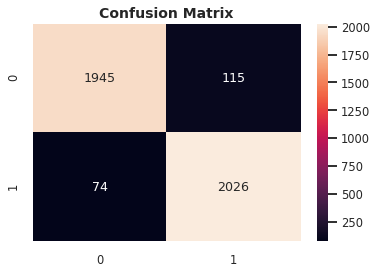

None


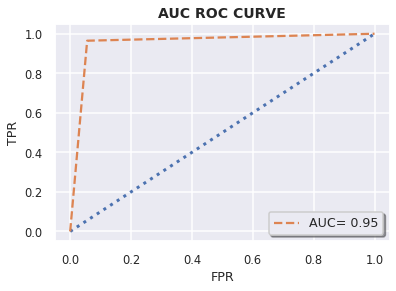




---------------- MULTINOMIAL NB ----------------

Training Accuracy : 0.9233173076923077 

Test Accuracy : 0.9 

Cross Val Score :  0.9053365384615384 

Log_loss : 3.4538993593251104 

ROC_AUC Score : 0.9004299583911234 


Classification Report :

               precision    recall  f1-score   support

           0       0.87      0.95      0.90      2060
           1       0.94      0.86      0.90      2100

    accuracy                           0.90      4160
   macro avg       0.90      0.90      0.90      4160
weighted avg       0.90      0.90      0.90      4160
 

Confusion Matrix :

 [[1947  113]
 [ 303 1797]] 



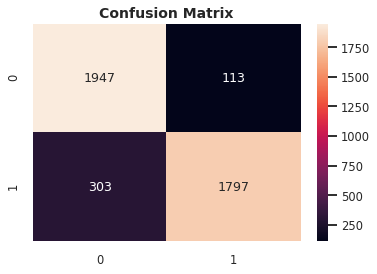

None


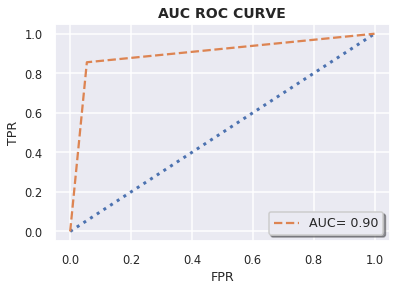




---------------- DECISION TREE CLASSIFIER ----------------

Training Accuracy : 1.0 

Test Accuracy : 0.9310096153846154 

Cross Val Score :  0.9319230769230769 

Log_loss : 2.382870569369477 

ROC_AUC Score : 0.9310147942672214 


Classification Report :

               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2060
           1       0.93      0.93      0.93      2100

    accuracy                           0.93      4160
   macro avg       0.93      0.93      0.93      4160
weighted avg       0.93      0.93      0.93      4160
 

Confusion Matrix :

 [[1919  141]
 [ 146 1954]] 



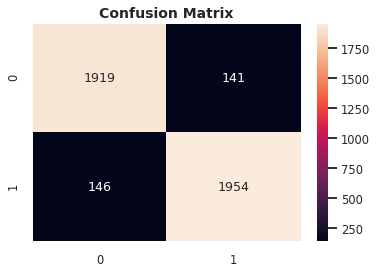

None


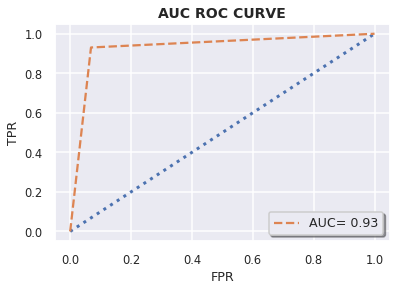




---------------- K NEIGHBORS CLASSIFIER ----------------

Training Accuracy : 0.6293870192307692 

Test Accuracy : 0.6026442307692308 

Cross Val Score :  0.5975480769230769 

Log_loss : 13.724495366490041 

ROC_AUC Score : 0.5988927415626445 


Classification Report :

               precision    recall  f1-score   support

           0       0.95      0.21      0.34      2060
           1       0.56      0.99      0.72      2100

    accuracy                           0.60      4160
   macro avg       0.75      0.60      0.53      4160
weighted avg       0.75      0.60      0.53      4160
 

Confusion Matrix :

 [[ 430 1630]
 [  23 2077]] 



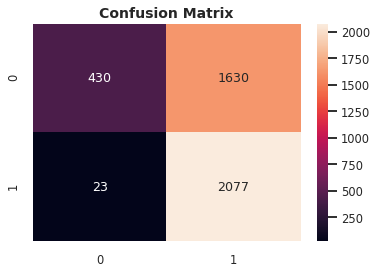

None


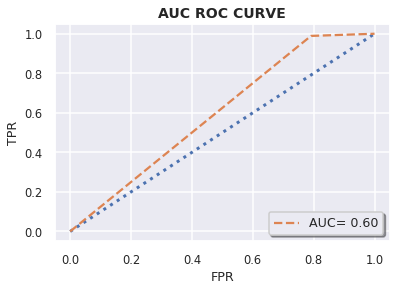




---------------- SVC ----------------

Training Accuracy : 0.9984375 

Test Accuracy : 0.9670673076923076 

Cross Val Score :  0.9653846153846153 

Log_loss : 1.1374695037277551 

ROC_AUC Score : 0.9670295885344428 


Classification Report :

               precision    recall  f1-score   support

           0       0.97      0.96      0.97      2060
           1       0.96      0.97      0.97      2100

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160
 

Confusion Matrix :

 [[1984   76]
 [  61 2039]] 



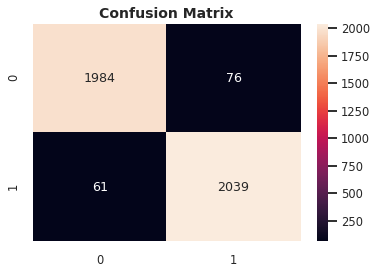

None


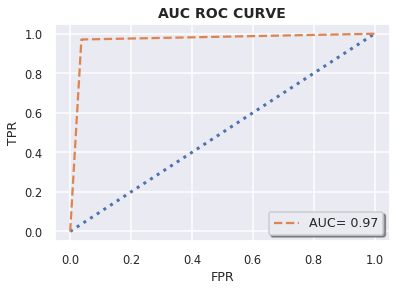




---------------- RANDOM FOREST CLASSIFIER ----------------

Training Accuracy : 1.0 

Test Accuracy : 0.9586538461538462 

Cross Val Score :  0.9553365384615384 

Log_loss : 1.4280578639808108 

ROC_AUC Score : 0.9587517337031901 


Classification Report :

               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2060
           1       0.97      0.95      0.96      2100

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160
 

Confusion Matrix :

 [[1996   64]
 [ 108 1992]] 



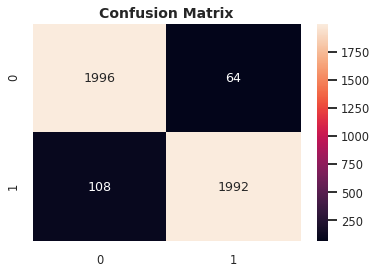

None


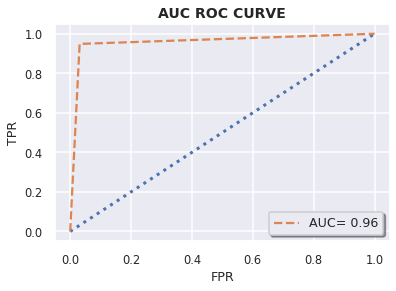




---------------- ADABOOST CLASSIFIER ----------------

Training Accuracy : 0.9606971153846153 

Test Accuracy : 0.9560096153846154 

Cross Val Score :  0.9536057692307691 

Log_loss : 1.5193942399035647 

ROC_AUC Score : 0.9559431345353675 


Classification Report :

               precision    recall  f1-score   support

           0       0.96      0.95      0.96      2060
           1       0.95      0.96      0.96      2100

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160
 

Confusion Matrix :

 [[1955  105]
 [  78 2022]] 



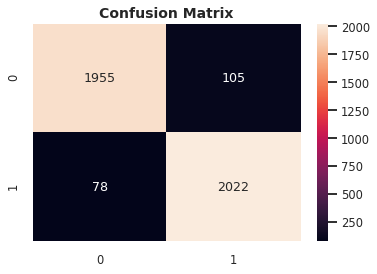

None


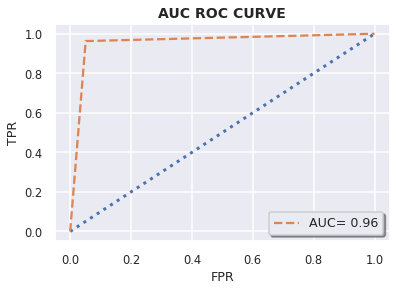




---------------- GRADIENT BOOSTING CLASSIFIER ----------------

Training Accuracy : 0.9650841346153847 

Test Accuracy : 0.9545673076923077 

Cross Val Score :  0.9565384615384614 

Log_loss : 1.569210167202681 

ROC_AUC Score : 0.9545053166897827 


Classification Report :

               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2060
           1       0.95      0.96      0.96      2100

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160
 

Confusion Matrix :

 [[1953  107]
 [  82 2018]] 



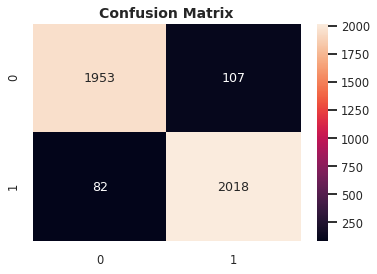

None


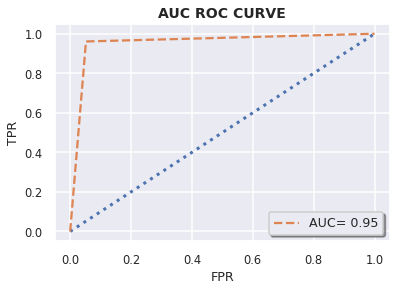




---------------- XG BOOST CLASSIFIER ----------------

Training Accuracy : 0.9133413461538461 

Test Accuracy : 0.9098557692307693 

Cross Val Score :  0.9122115384615384 

Log_loss : 3.113509295381071 

ROC_AUC Score : 0.909803513638465 


Classification Report :

               precision    recall  f1-score   support

           0       0.91      0.90      0.91      2060
           1       0.91      0.92      0.91      2100

    accuracy                           0.91      4160
   macro avg       0.91      0.91      0.91      4160
weighted avg       0.91      0.91      0.91      4160
 

Confusion Matrix :

 [[1863  197]
 [ 178 1922]] 



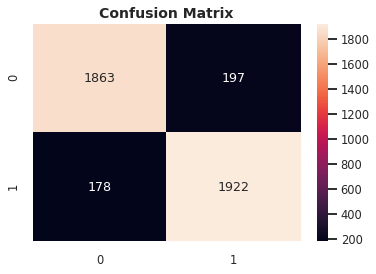

None


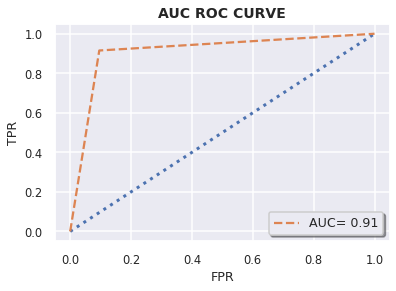

In [82]:
# Creating a list which holds the models and printing the same.

for name,model in models:
    k=model
    print('----------------',name,'----------------\n')
    scores = clf(k, X_features, y)
    model_name.append(name)

In [83]:
# Printing the results in a dataFrame.

results = pd.DataFrame({"Model" : model_name,
                        'Train Accuracy' : train_acc,
                        'Test Accuracy': test_acc ,
                        'Cross Validation Score' : cv,
                        'Logg Loss': log_loss_score,
                        'AUC ROC Score' : auc_roc_score,
                        'Precision' : precision,
                        'Recall' : recall,
                        'F1 Score' : f_1_score
                        })

results

,Model,Train Accuracy,Test Accuracy,Cross Validation Score,Logg Loss,AUC ROC Score,Precision,Recall,F1 Score
0,LOGISTIC REGRESSION,0.974519,0.954567,0.953750,1.569212,0.954468,0.946287,0.964762,0.955435
1,MULTINOMIAL NB,0.923317,0.900000,0.905337,3.453899,0.900430,0.940838,0.855714,0.896259
2,DECISION TREE CLASSIFIER,1.000000,0.931010,0.931923,2.382871,0.931015,0.932697,0.930476,0.931585
3,K NEIGHBORS CLASSIFIER,0.629387,0.602644,0.597548,13.724495,0.598893,0.560291,0.989048,0.715344
4,SVC,0.998437,0.967067,0.965385,1.137470,0.967030,0.964066,0.970952,0.967497
5,RANDOM FOREST CLASSIFIER,1.000000,0.958654,0.955337,1.428058,0.958752,0.968872,0.948571,0.958614
6,ADABOOST CLASSIFIER,0.960697,0.956010,0.953606,1.519394,0.955943,0.950635,0.962857,0.956707
7,GRADIENT BOOSTING CLASSIFIER,0.965084,0.954567,0.956538,1.569210,0.954505,0.949647,0.960952,0.955266
8,XG BOOST CLASSIFIER,0.913341,0.909856,0.912212,3.113509,0.909804,0.907032,0.915238,0.911116


**SVC** is performing the best among all the models trained and test. It is performing better in all the aspects i.e. scores as compared to other models. Thus, SVC is selected as a model for this dataset.

### **Hypertuning the parameters of the selected models using RandomizedSearchCV**

    Finding the best parameters for the models using RandomizedSearchCV.

###### Logistic regression

In [50]:
# Creating the hyperparameter grid  
lg_param = {
            "penalty": ['l1', 'l2'],
            "C": np.logspace(0, 4, 10)
            }

# Instantiating RandomizedSearchCV object 
lg_random = RandomizedSearchCV(lg, lg_param, cv = 3,verbose=0, n_jobs=-1) 

# Fitting the model for learning   
lg_random.fit(X_features, y)

# Print the tuned parameters and score 
print("Tuned Parameters : {}".format(lg_random.best_params_), '\n') 
print("Best score : {}".format(lg_random.best_score_))

Tuned Parameters : {'penalty': 'l2', 'C': 166.81005372000593}
Best score : 0.9643269622037725


###### SVC

In [ ]:
# Creating the hyperparameter grid  
svc_param = {
             'kernel' : ['linear', 'rbf', 'poly', 'Sigmoid'],
             'gamma' : [0.1, 1, 0.01, 0.001],
             'C' : [0.1, 1, 10, 100, 1000]
             }

# Instantiating RandomizedSearchCV object 
svc_random = RandomizedSearchCV(svc, svc_param, cv = 3,verbose=0, n_jobs=-1)

# Fitting the model for learning   
svc_random.fit(X_features, y) 

# Print the tuned parameters and score 
print("Tuned Parameters : {}".format(svc_random.best_params_), '\n') 
print("Best score : {}".format(svc_random.best_score_))

###### Random Forest

In [56]:
# Creating the hyperparameter grid  
rf_param = {
            'n_estimators' : [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'max_depth' : [2, 4, None],
            'min_samples_split' : [2, 4, 6],
            'min_samples_leaf' : [2, 4, 6],
            'bootstrap' : [True, False],
            'criterion' : ['entropy', 'gini']
            }

# Instantiating RandomizedSearchCV object 
rf_random = RandomizedSearchCV(rf, rf_param, cv = 3,verbose=0, n_jobs=-1) 

# Fitting the model for learning   
rf_random.fit(X_features, y) 

# Print the tuned parameters and score 
print("Tuned Parameters : {}".format(rf_random.best_params_), '\n') 
print("Best score : {}".format(rf_random.best_score_))

Tuned Parameters : {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}

Best score : 0.925144521644413 


###### Gradient Boosting

In [54]:
# Creating the hyperparameter grid  
gb_param = { 
            'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
            'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'max_depth': [int(x) for x in np.linspace(10, 100, num = 10)],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf' : [1, 2, 4],
            }

# Instantiating RandomizedSearchCV object 
gb_random = RandomizedSearchCV(gb, gb_param, cv = 3,verbose=0, n_jobs=-1) 

# Fitting the model for learning   
gb_random.fit(X_features, y) 

# Print the tuned parameters and score 
print("Tuned Parameters : {}".format(gb_random.best_params_), '\n') 
print("Best score : {}".format(gb_random.best_score_)) 

Tuned Parameters : {'n_estimators': 60, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'learning_rate': 0.05}

Best score : 0.9626442860672576 


###### XG Boost

In [55]:
# Creating the hyperparameter grid  
xgb_param = {
             'min_child_weight':[4,5], 
             'gamma':[i/10.0 for i in range(3,6)], 
             'subsample':[i/10.0 for i in range(6,11)],
             'colsample_bytree':[i/10.0 for i in range(6,11)], 
             'max_depth': [2,3,4]
             }

# Instantiating RandomizedSearchCV object 
xgb_random = RandomizedSearchCV(xgb, xgb_param, cv = 3,verbose=0, n_jobs=-1)

# Fitting the model for learning   
xgb_random.fit(X_features, y) 

# Print the tuned parameters and score 
print("Tuned Parameters : {}".format(xgb_random.best_params_), '\n') 
print("Best score : {}".format(xgb_random.best_score_))

Tuned Parameters : {'subsample': 0.6, 'min_child_weight': 4, 'max_depth': 4, 'gamma': 0.3, 'colsample_bytree': 0.6}

Best score : 0.933317138660665


In [34]:
# Creating the instances after getting the best parameters for getting the results of the respective models after hypertuning.

# Logistic Regression
lg_random_tuned = LogisticRegression(penalty = 'l2',
                                     C = 166.81005372000593)

# SVC
svc_random_tuned = SVC(kernel = 'rbf',
                       gamma = 1,
                       C = 1000)

# RandomForest Classifier
rf_random_tuned = RandomForestClassifier(n_estimators = 50,
                                         min_samples_split = 2,
                                         min_samples_leaf = 2, 
                                         max_features = 'sqrt',
                                         max_depth = None,
                                         criterion = 'entropy',
                                         bootstrap = False)

# Gradient Boosting
gb_random_tuned = GradientBoostingClassifier(n_estimators = 60,
                                             min_samples_split = 2,
                                             min_samples_leaf = 4, 
                                             max_features = 'sqrt',
                                             max_depth = 100,
                                             learning_rate = 0.05)

# XG Boost
xgb_random_tuned = xg.XGBRFClassifier(subsample = 0.6,
                                      min_child_weight = 4,
                                      max_depth = 4,
                                      gamma = 0.3,
                                      colsample_bytree = 0.6)

In [35]:
tuned_models = []
tuned_models.append(('LOGISTIC REGRESSION', lg_random_tuned))
tuned_models.append(('SVC', svc_random_tuned))
tuned_models.append(('RANDOM FOREST CLASSIFIER', rf_random_tuned))
tuned_models.append(('GRADIENT BOOSTING CLASSIFIER', gb_random_tuned))
tuned_models.append(('XG BOOST CLASSIFIER', xgb_random_tuned))

---------------- LOGISTIC REGRESSION ----------------

Training Accuracy : 1.0 

Test Accuracy : 0.9644230769230769 

Cross Val Score :  0.9637499999999999 

Log_loss : 1.2287989600573632 

ROC_AUC Score : 0.9643874248728617 


Classification Report :

               precision    recall  f1-score   support

           0       0.97      0.96      0.96      2060
           1       0.96      0.97      0.96      2100

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160
 

Confusion Matrix :

 [[1979   81]
 [  67 2033]] 



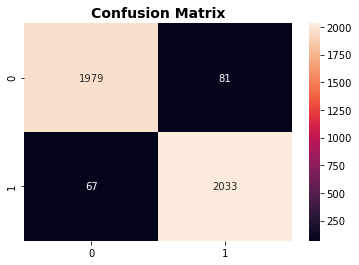

None


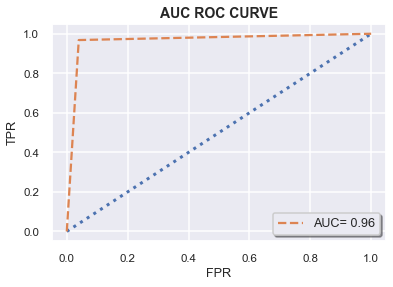




---------------- SVC ----------------

Training Accuracy : 1.0 

Test Accuracy : 0.9697115384615385 

Cross Val Score :  0.9668750000000002 

Log_loss : 1.0461400473981473 

ROC_AUC Score : 0.9696717521960241 


Classification Report :

               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2060
           1       0.97      0.97      0.97      2100

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160
 

Confusion Matrix :

 [[1989   71]
 [  55 2045]] 



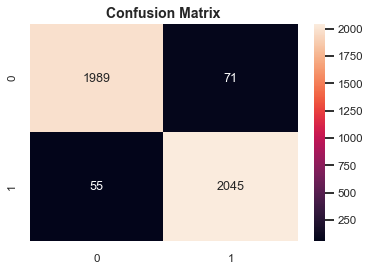

None


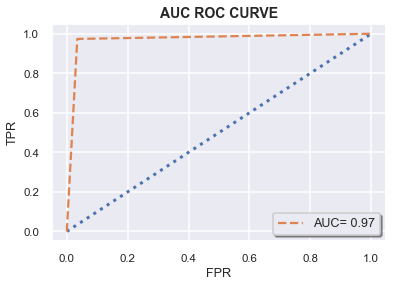




---------------- RANDOM FOREST CLASSIFIER ----------------

Training Accuracy : 0.9998197115384615 

Test Accuracy : 0.9524038461538461 

Cross Val Score :  0.9538461538461538 

Log_loss : 1.6439294450892583 

ROC_AUC Score : 0.9524595469255663 


Classification Report :

               precision    recall  f1-score   support

           0       0.95      0.96      0.95      2060
           1       0.96      0.95      0.95      2100

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160
 

Confusion Matrix :

 [[1974   86]
 [ 112 1988]] 



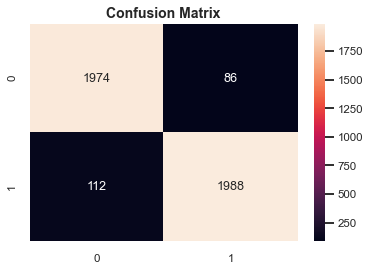

None


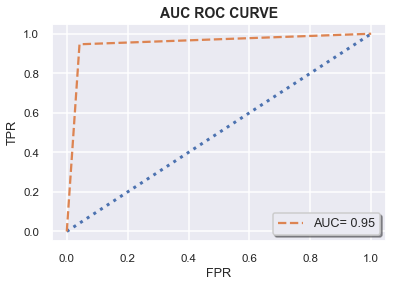




---------------- GRADIENT BOOSTING CLASSIFIER ----------------

Training Accuracy : 1.0 

Test Accuracy : 0.9610576923076923 

Cross Val Score :  0.9650961538461539 

Log_loss : 1.3450334968727182 

ROC_AUC Score : 0.9610957004160888 


Classification Report :

               precision    recall  f1-score   support

           0       0.96      0.97      0.96      2060
           1       0.97      0.96      0.96      2100

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160
 

Confusion Matrix :

 [[1988   72]
 [  90 2010]] 



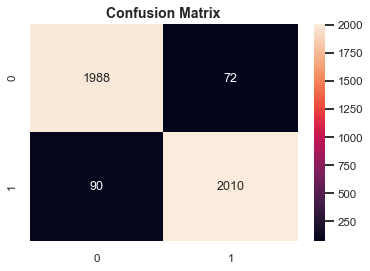

None


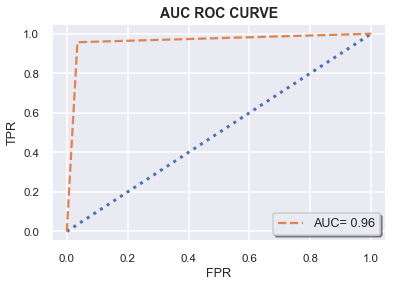




---------------- XG BOOST CLASSIFIER ----------------

Training Accuracy : 0.9353365384615384 

Test Accuracy : 0.9286057692307692 

Cross Val Score :  0.9327884615384615 

Log_loss : 2.465903393758082 

ROC_AUC Score : 0.9284674063800278 


Classification Report :

               precision    recall  f1-score   support

           0       0.94      0.91      0.93      2060
           1       0.92      0.94      0.93      2100

    accuracy                           0.93      4160
   macro avg       0.93      0.93      0.93      4160
weighted avg       0.93      0.93      0.93      4160
 

Confusion Matrix :

 [[1883  177]
 [ 120 1980]] 



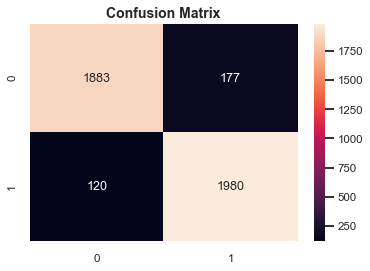

None


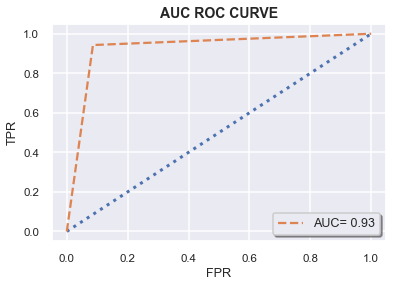

In [36]:
# Creating a list which holds the algorithms and printing the same.

tuned_model_name = []

for name,model in tuned_models:
    k=model
    print('----------------',name,'----------------\n')
    scores = clf(k, X_features, y)
    tuned_model_name.append(name)

In [37]:
# Printing the results in a dataFrame.

hyper_results = pd.DataFrame({"Model" : tuned_model_name,
                        'Train Accuracy' : train_acc,
                        'Test Accuracy': test_acc ,
                        'Cross Validation Score' : cv,
                        'Logg Loss': log_loss_score,
                        'AUC ROC Score' : auc_roc_score,
                        'Precision' : precision,
                        'Recall' : recall,
                        'F1 Score' : f_1_score
                        })

hyper_results

,Model,Train Accuracy,Test Accuracy,Cross Validation Score,Logg Loss,AUC ROC Score,Precision,Recall,F1 Score
0,LOGISTIC REGRESSION,1.000000,0.964423,0.963750,1.228799,0.964387,0.961684,0.968095,0.964879
1,SVC,1.000000,0.969712,0.966875,1.046140,0.969672,0.966446,0.973810,0.970114
2,RANDOM FOREST CLASSIFIER,0.999820,0.952404,0.953846,1.643929,0.952460,0.958534,0.946667,0.952563
3,GRADIENT BOOSTING CLASSIFIER,1.000000,0.961058,0.965096,1.345033,0.961096,0.965418,0.957143,0.961263
4,XG BOOST CLASSIFIER,0.935337,0.928606,0.932788,2.465903,0.928467,0.917942,0.942857,0.930233


### **Hypertuning the parameters of the selected models using GridSearchCV**

    Finding the best parameters for the models using GridSearchCV.

###### Logistic Regression

In [ ]:
# Creating the hyperparameter grid  
lg_param = {
            "penalty": ['l1', 'l2'],
            "C": np.logspace(0, 4, 10)
            }

# Instantiating RandomizedSearchCV object 
lg_grid = GridSearchCV(lg, lg_param, cv = 3,verbose=0, n_jobs=-1) 

# Fitting the model for learning   
lg_grid.fit(X_features, y)

# Print the tuned parameters and score 
print("Tuned Parameters : {}".format(lg_grid.best_params_), '\n') 
print("Best score : {}".format(lg_grid.best_score_))

In [40]:
lg_grid_tuned = LogisticRegression(C = 166.81005372000593,
                                   penalty = 'l2')

# train the model
lg_grid_tuned.fit(X_train, y_train)

# compute the training accuracy
train_accuracy = accuracy_score(y_train, lg_grid_tuned.predict(X_train))
print('Training Accuracy : {}'.format(train_accuracy), "\n")

# compute the test accuracy
pred = lg_grid_tuned.predict(X_test)
test_accuracy = accuracy_score(y_test, pred)
print('Test Accuracy : {}'.format(test_accuracy), "\n")

Training Accuracy : 1.0 

Test Accuracy : 0.9641826923076923 



###### SVC

In [ ]:
# Creating the hyperparameter grid  
svc_param = {
             'kernel' : ['linear', 'rbf', 'poly', 'Sigmoid'],
             'gamma' : [0.1, 1, 0.01, 0.001],
             'C' : [0.1, 1, 10, 100, 1000]
             }

# Instantiating RandomizedSearchCV object 
svc_grid = GridSearchCV(svc, svc_param, cv = 3,verbose=0, n_jobs=-1)

# Fitting the model for learning   
svc_grid.fit(X_features, y) 

# Print the tuned parameters and score 
print("Tuned Parameters : {}".format(svc_grid.best_params_), '\n') 
print("Best score : {}".format(svc_grid.best_score_))

In [41]:
svc_grid_tuned = SVC(C = 10,
                     gamma = 1,
                     kernel = 'rbf')

# train the model
svc_grid_tuned.fit(X_train, y_train)

# compute the training accuracy
train_accuracy = accuracy_score(y_train, svc_grid_tuned.predict(X_train))
print('Training Accuracy : {}'.format(train_accuracy), "\n")

# compute the test accuracy
pred = svc_grid_tuned.predict(X_test)
test_accuracy = accuracy_score(y_test, pred)
print('Test Accuracy : {}'.format(test_accuracy), "\n")

Training Accuracy : 1.0 

Test Accuracy : 0.9697115384615385 



###### RandomForest Classifier

In [ ]:
# Creating the hyperparameter grid  
rf_param = {
            'n_estimators' : [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'max_depth' : [2, 4, None],
            'min_samples_split' : [2, 4, 6],
            'min_samples_leaf' : [2, 4, 6],
            'bootstrap' : [True, False],
            'criterion' : ['entropy', 'gini']
            }

# Instantiating RandomizedSearchCV object 
rf_grid = GridSearchCV(rf, rf_param, cv = 3,verbose=0, n_jobs=-1) 

# Fitting the model for learning   
rf_grid.fit(X_features, y) 

# Print the tuned parameters and score 
print("Tuned Parameters : {}".format(rf_grid.best_params_), '\n') 
print("Best score : {}".format(rf_grid.best_score_))

In [43]:
rf_grid_tuned = RandomForestClassifier(bootstrap = False,
                                       criterion = 'gini',
                                       max_depth = None,
                                       max_features = 'sqrt',
                                       min_samples_leaf = 2,
                                       min_samples_split = 6,
                                       n_estimators = 90)

# train the model
rf_grid_tuned.fit(X_train, y_train)

# compute the training accuracy
train_accuracy = accuracy_score(y_train, rf_grid_tuned.predict(X_train))
print('Training Accuracy : {}'.format(train_accuracy), "\n")

# compute the test accuracy
pred = rf_grid_tuned.predict(X_test)
test_accuracy = accuracy_score(y_test, pred)
print('Test Accuracy : {}'.format(test_accuracy), "\n")

Training Accuracy : 0.9998798076923077 

Test Accuracy : 0.9567307692307693 



**SVC** is performing the best among all the models trained and test. It is performing better in all the aspects i.e. scores as compared to other models. Thus, SVC is selected as a model for this dataset. The Mean Validation Accuracy, so obtained, is 96.70%.

### Predicting the values using the selceted model - SVC 

In [93]:
# Predicting the values

svc.fit(X_features, y)
predict = svc.predict(X_test)
predict

array([1, 1, 0, ..., 1, 1, 0])

In [89]:
# predicting the model.

def find(x):
    if x == 1:
        print ("\n\n This News is FAKE")
    else:
        print ("\n\n This News is NOT FAKE")

text = input('Enter news here!  \n')
integers = tf_vec.transform([text])
x = svc.predict(integers)[0]
find(x) 

Enter news here!  
Rumors are rife that the late pastor had complete control over Park’s body and soul during her formative years and that his children accumulated enormous wealth as a result,” read the cable, released by WikiLeaks.  Park has strongly denied any improper relationship.  But South Korean media have uncovered evidence that, they claim, shows that Choi Soon-sil wielded undue influence over the president.  JTBC, a television network, said it had found a tablet computer that contained files of speeches the president had yet to give, among other documents. The younger Choi is said to have edited the landmark speech that Park gave in Germany in 2014, laying out her vision for unification with the North. The Hankyoreh newspaper wrote that actual presidential aides “were just mice to Choi’s cat.”  She is also rumored to have created a secret group called “the eight fairies” to advise the president behind the scenes.  TV Chosun, the channel belonging to the Chosun Ilbo newspaper,

In [91]:
# predicting the model.

def find(x):
    if x == 1:
        print ("\n\n This News is FAKE")
    else:
        print ("\n\n This News is NOT FAKE")

text = input('Enter news here!  \n')
integers = tf_vec.transform([text])
x = svc.predict(integers)[0]
find(x) 

Enter news here!  
They don’t understand that Trump is not a special interest candidate, by which I mean that he is not going to put any minority group ahead of the rest of us at our expense, but he is not racist towards minorities, or sexist towards women.


 This News is FAKE
